# Creating and Backtesting MACD Strategies

## Getting the Data

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
data = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

In [53]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
import yfinance as yf
   
start1 = '2020-01-01'
end1='2021-03-01'
# looping over tickers and creating a dataframe with close prices
stocks = yf.download('AAPL',start1,end1,interval='1d')


[*********************100%***********************]  1 of 1 completed


## Defining an MACD Strategy (Part 1)

In [54]:
data = stocks.copy()


In [4]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   74.207466   
2020-01-03   74.287498   75.144997   74.125000   74.357498   73.486023   
2020-01-06   73.447502   74.989998   73.187500   74.949997   74.071579   
2020-01-07   74.959999   75.224998   74.370003   74.597504   73.723213   
2020-01-08   74.290001   76.110001   74.290001   75.797501   74.909149   
...                ...         ...         ...         ...         ...   
2021-02-22  128.009995  129.720001  125.599998  126.000000  125.786346   
2021-02-23  123.760002  126.709999  118.389999  125.860001  125.646584   
2021-02-24  124.940002  125.559998  122.230003  125.349998  125.137444   
2021-02-25  124.680000  126.459999  120.540001  120.989998  120.784836   
2021-02-26  122.589996  124.849998  121.199997  121.260002  121.054382   

               Volume  
Date                   
2020-01-02  135480400  
2020-01-03  146322800  
2020-01-06  118387200  
2020-01-07  108872000  
2020-01-08  132079200  
...               ...  
2021-02-22  103916400  
2021-02-23  158273000  
2021-02-24  111039900  
2021-02-25  148199500  
2021-02-26  164560400  

[291 rows x 6 columns]

In [55]:
ema_s = 12 # EMA Short
ema_l = 26 # EMA Long

In [56]:
data["EMA_S"] = data.Close.ewm(span = ema_s, min_periods = ema_s).mean() 

In [57]:
data["EMA_L"] = data.Close.ewm(span = ema_l, min_periods = ema_l).mean() 

In [58]:
data.loc["2020", ["Close", "EMA_S", "EMA_L"]]


Close       EMA_S       EMA_L
Date                                          
2020-01-02   75.087502         NaN         NaN
2020-01-03   74.357498         NaN         NaN
2020-01-06   74.949997         NaN         NaN
2020-01-07   74.597504         NaN         NaN
2020-01-08   75.797501         NaN         NaN
...                ...         ...         ...
2020-12-24  131.970001  127.699314  124.375841
2020-12-28  136.690002  129.082497  125.288001
2020-12-29  134.869995  129.972881  125.997778
2020-12-30  133.720001  130.549361  126.569795
2020-12-31  132.690002  130.878691  127.023144

[253 rows x 3 columns]

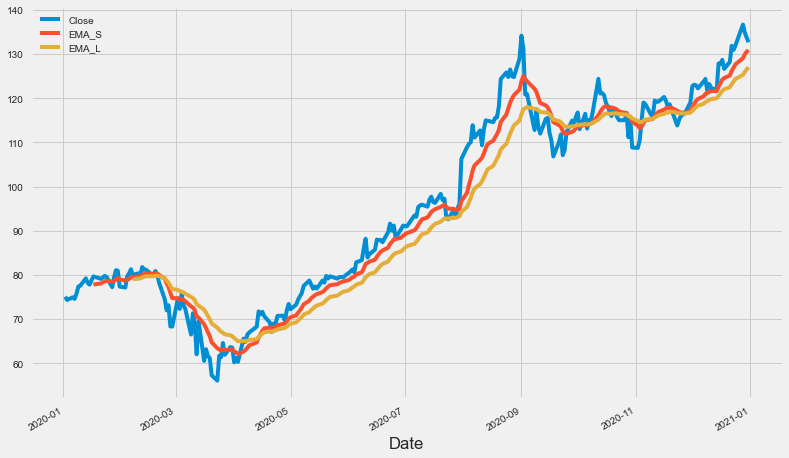

In [59]:
data.loc["2020", ["Close", "EMA_S", "EMA_L"]].plot(figsize = (12, 8))
plt.show()

In [60]:
data["MACD"] = data.EMA_S - data.EMA_L

In [16]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   74.207466   
2020-01-03   74.287498   75.144997   74.125000   74.357498   73.486023   
2020-01-06   73.447502   74.989998   73.187500   74.949997   74.071579   
2020-01-07   74.959999   75.224998   74.370003   74.597504   73.723213   
2020-01-08   74.290001   76.110001   74.290001   75.797501   74.909149   
...                ...         ...         ...         ...         ...   
2021-02-22  128.009995  129.720001  125.599998  126.000000  125.786346   
2021-02-23  123.760002  126.709999  118.389999  125.860001  125.646584   
2021-02-24  124.940002  125.559998  122.230003  125.349998  125.137444   
2021-02-25  124.680000  126.459999  120.540001  120.989998  120.784836   
2021-02-26  122.589996  124.849998  121.199997  121.260002  121.054382   

               Volume       EMA_S       EMA_L      MACD  
Date                                                     
2020-01-02  135480400         NaN         NaN       NaN  
2020-01-03  146322800         NaN         NaN       NaN  
2020-01-06  118387200         NaN         NaN       NaN  
2020-01-07  108872000         NaN         NaN       NaN  
2020-01-08  132079200         NaN         NaN       NaN  
...               ...         ...         ...       ...  
2021-02-22  103916400  132.122755  132.843039 -0.720284  
2021-02-23  158273000  131.159255  132.325777 -1.166523  
2021-02-24  111039900  130.265523  131.809053 -1.543530  
2021-02-25  148199500  128.838519  131.007641 -2.169122  
2021-02-26  164560400  127.672593  130.285594 -2.613001  

[291 rows x 9 columns]

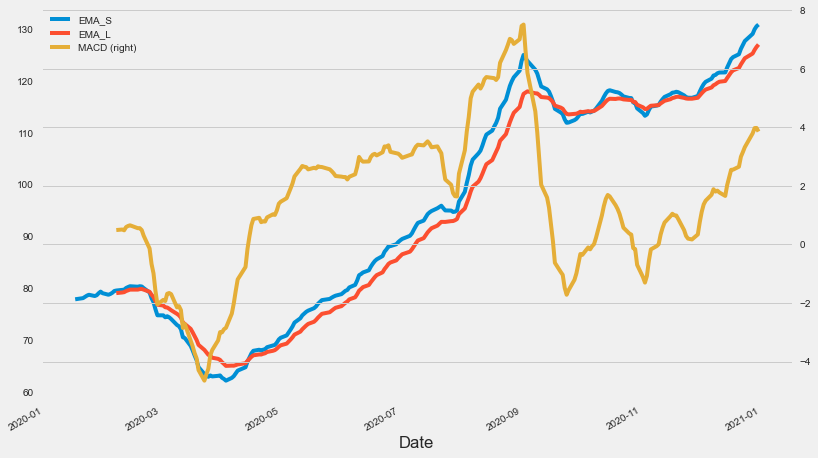

In [18]:
data.loc["2020", ["EMA_S", "EMA_L", "MACD"]].plot(figsize = (12, 8), secondary_y = "MACD")
plt.show()

In [19]:
signal_mw = 9 # Moving Window for Signal Line

In [20]:
data["MACD_Signal"] = data.MACD.ewm(span = signal_mw, min_periods = signal_mw).mean() 

In [21]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   74.207466   
2020-01-03   74.287498   75.144997   74.125000   74.357498   73.486023   
2020-01-06   73.447502   74.989998   73.187500   74.949997   74.071579   
2020-01-07   74.959999   75.224998   74.370003   74.597504   73.723213   
2020-01-08   74.290001   76.110001   74.290001   75.797501   74.909149   
...                ...         ...         ...         ...         ...   
2021-02-22  128.009995  129.720001  125.599998  126.000000  125.786346   
2021-02-23  123.760002  126.709999  118.389999  125.860001  125.646584   
2021-02-24  124.940002  125.559998  122.230003  125.349998  125.137444   
2021-02-25  124.680000  126.459999  120.540001  120.989998  120.784836   
2021-02-26  122.589996  124.849998  121.199997  121.260002  121.054382   

               Volume       EMA_S       EMA_L      MACD  MACD_Signal  
Date                                                                  
2020-01-02  135480400         NaN         NaN       NaN          NaN  
2020-01-03  146322800         NaN         NaN       NaN          NaN  
2020-01-06  118387200         NaN         NaN       NaN          NaN  
2020-01-07  108872000         NaN         NaN       NaN          NaN  
2020-01-08  132079200         NaN         NaN       NaN          NaN  
...               ...         ...         ...       ...          ...  
2021-02-22  103916400  132.122755  132.843039 -0.720284     0.604696  
2021-02-23  158273000  131.159255  132.325777 -1.166523     0.250452  
2021-02-24  111039900  130.265523  131.809053 -1.543530    -0.108344  
2021-02-25  148199500  128.838519  131.007641 -2.169122    -0.520500  
2021-02-26  164560400  127.672593  130.285594 -2.613001    -0.939000  

[291 rows x 10 columns]

In [22]:
data.loc["2020"]

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   74.207466   
2020-01-03   74.287498   75.144997   74.125000   74.357498   73.486023   
2020-01-06   73.447502   74.989998   73.187500   74.949997   74.071579   
2020-01-07   74.959999   75.224998   74.370003   74.597504   73.723213   
2020-01-08   74.290001   76.110001   74.290001   75.797501   74.909149   
...                ...         ...         ...         ...         ...   
2020-12-24  131.320007  133.460007  131.100006  131.970001  131.549637   
2020-12-28  133.990005  137.339996  133.509995  136.690002  136.254608   
2020-12-29  138.050003  138.789993  134.339996  134.869995  134.440399   
2020-12-30  135.580002  135.990005  133.399994  133.720001  133.294067   
2020-12-31  134.080002  134.740005  131.720001  132.690002  132.267349   

               Volume       EMA_S       EMA_L      MACD  MACD_Signal  
Date                                                                  
2020-01-02  135480400         NaN         NaN       NaN          NaN  
2020-01-03  146322800         NaN         NaN       NaN          NaN  
2020-01-06  118387200         NaN         NaN       NaN          NaN  
2020-01-07  108872000         NaN         NaN       NaN          NaN  
2020-01-08  132079200         NaN         NaN       NaN          NaN  
...               ...         ...         ...       ...          ...  
2020-12-24   54930100  127.699314  124.375841  3.323474     2.665410  
2020-12-28  124486200  129.082497  125.288001  3.794496     2.891227  
2020-12-29  121047300  129.972881  125.997778  3.975103     3.108002  
2020-12-30   96452100  130.549361  126.569795  3.979567     3.282315  
2020-12-31   99116600  130.878691  127.023144  3.855547     3.396961  

[253 rows x 10 columns]

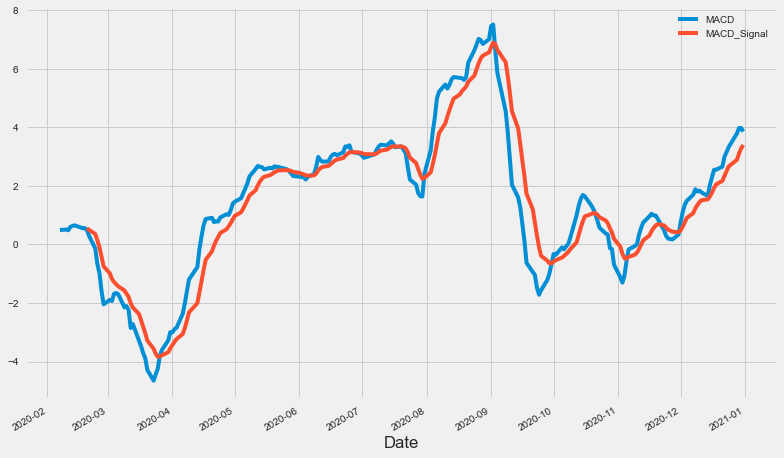

In [23]:
data.loc["2020", ["MACD", "MACD_Signal"]].plot(figsize = (12, 8))
plt.show()

## Defining an MACD Strategy (Part 2)

In [24]:
data["position"] = np.where(data.MACD - data.MACD_Signal > 0, 1, -1)

In [25]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   74.207466   
2020-01-03   74.287498   75.144997   74.125000   74.357498   73.486023   
2020-01-06   73.447502   74.989998   73.187500   74.949997   74.071579   
2020-01-07   74.959999   75.224998   74.370003   74.597504   73.723213   
2020-01-08   74.290001   76.110001   74.290001   75.797501   74.909149   
...                ...         ...         ...         ...         ...   
2021-02-22  128.009995  129.720001  125.599998  126.000000  125.786346   
2021-02-23  123.760002  126.709999  118.389999  125.860001  125.646584   
2021-02-24  124.940002  125.559998  122.230003  125.349998  125.137444   
2021-02-25  124.680000  126.459999  120.540001  120.989998  120.784836   
2021-02-26  122.589996  124.849998  121.199997  121.260002  121.054382   

               Volume       EMA_S       EMA_L      MACD  MACD_Signal  position  
Date                                                                            
2020-01-02  135480400         NaN         NaN       NaN          NaN        -1  
2020-01-03  146322800         NaN         NaN       NaN          NaN        -1  
2020-01-06  118387200         NaN         NaN       NaN          NaN        -1  
2020-01-07  108872000         NaN         NaN       NaN          NaN        -1  
2020-01-08  132079200         NaN         NaN       NaN          NaN        -1  
...               ...         ...         ...       ...          ...       ...  
2021-02-22  103916400  132.122755  132.843039 -0.720284     0.604696        -1  
2021-02-23  158273000  131.159255  132.325777 -1.166523     0.250452        -1  
2021-02-24  111039900  130.265523  131.809053 -1.543530    -0.108344        -1  
2021-02-25  148199500  128.838519  131.007641 -2.169122    -0.520500        -1  
2021-02-26  164560400  127.672593  130.285594 -2.613001    -0.939000        -1  

[291 rows x 11 columns]

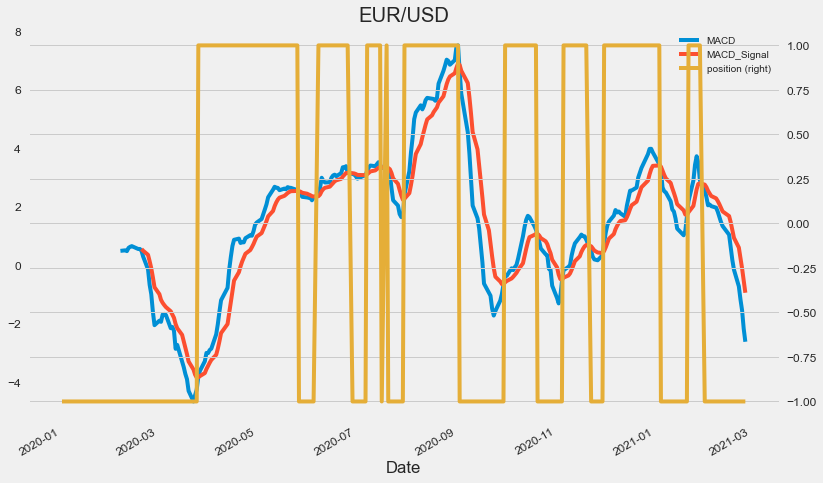

In [26]:
data.loc[:, ["MACD", "MACD_Signal", "position"]].plot(figsize = (12, 8), fontsize = 12, 
                                                      secondary_y = "position", title = "EUR/USD")
plt.show()

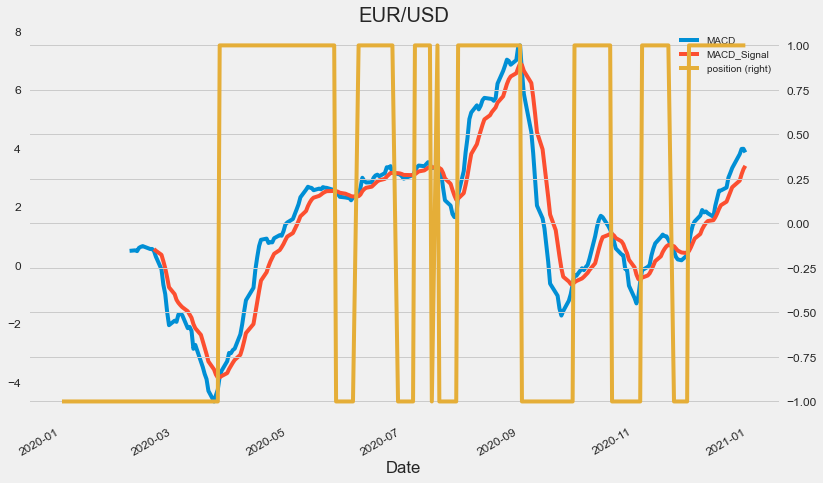

In [28]:
data.loc["2020", ["MACD", "MACD_Signal", "position"]].plot(figsize = (12, 8), fontsize = 12,
                                                           secondary_y = "position", title = "EUR/USD")
plt.show()

## Vectorized Strategy Backtesting

In [29]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   74.207466   
2020-01-03   74.287498   75.144997   74.125000   74.357498   73.486023   
2020-01-06   73.447502   74.989998   73.187500   74.949997   74.071579   
2020-01-07   74.959999   75.224998   74.370003   74.597504   73.723213   
2020-01-08   74.290001   76.110001   74.290001   75.797501   74.909149   
...                ...         ...         ...         ...         ...   
2021-02-22  128.009995  129.720001  125.599998  126.000000  125.786346   
2021-02-23  123.760002  126.709999  118.389999  125.860001  125.646584   
2021-02-24  124.940002  125.559998  122.230003  125.349998  125.137444   
2021-02-25  124.680000  126.459999  120.540001  120.989998  120.784836   
2021-02-26  122.589996  124.849998  121.199997  121.260002  121.054382   

               Volume       EMA_S       EMA_L      MACD  MACD_Signal  position  
Date                                                                            
2020-01-02  135480400         NaN         NaN       NaN          NaN        -1  
2020-01-03  146322800         NaN         NaN       NaN          NaN        -1  
2020-01-06  118387200         NaN         NaN       NaN          NaN        -1  
2020-01-07  108872000         NaN         NaN       NaN          NaN        -1  
2020-01-08  132079200         NaN         NaN       NaN          NaN        -1  
...               ...         ...         ...       ...          ...       ...  
2021-02-22  103916400  132.122755  132.843039 -0.720284     0.604696        -1  
2021-02-23  158273000  131.159255  132.325777 -1.166523     0.250452        -1  
2021-02-24  111039900  130.265523  131.809053 -1.543530    -0.108344        -1  
2021-02-25  148199500  128.838519  131.007641 -2.169122    -0.520500        -1  
2021-02-26  164560400  127.672593  130.285594 -2.613001    -0.939000        -1  

[291 rows x 11 columns]

In [31]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))

In [32]:
data.dropna(inplace = True)

In [33]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-02-20   80.657501   81.162498   79.552498   80.074997   79.324333   
2020-02-21   79.654999   80.112503   77.625000   78.262497   77.528809   
2020-02-24   74.315002   76.044998   72.307503   74.544998   73.846161   
2020-02-25   75.237503   75.632500   71.532501   72.019997   71.344841   
2020-02-26   71.632500   74.470001   71.625000   73.162498   72.476631   
...                ...         ...         ...         ...         ...   
2021-02-22  128.009995  129.720001  125.599998  126.000000  125.786346   
2021-02-23  123.760002  126.709999  118.389999  125.860001  125.646584   
2021-02-24  124.940002  125.559998  122.230003  125.349998  125.137444   
2021-02-25  124.680000  126.459999  120.540001  120.989998  120.784836   
2021-02-26  122.589996  124.849998  121.199997  121.260002  121.054382   

               Volume       EMA_S       EMA_L      MACD  MACD_Signal  \
Date                                                                   
2020-02-20  100566000   80.329424   79.839493  0.489931     0.553302   
2020-02-21  129554000   80.010514   79.714204  0.296309     0.495721   
2020-02-24  222195200   79.167605   79.305719 -0.138114     0.357041   
2020-02-25  230673600   78.065694   78.732816 -0.667122     0.137094   
2020-02-26  198054800   77.310033   78.296789 -0.986756    -0.100752   
...               ...         ...         ...       ...          ...   
2021-02-22  103916400  132.122755  132.843039 -0.720284     0.604696   
2021-02-23  158273000  131.159255  132.325777 -1.166523     0.250452   
2021-02-24  111039900  130.265523  131.809053 -1.543530    -0.108344   
2021-02-25  148199500  128.838519  131.007641 -2.169122    -0.520500   
2021-02-26  164560400  127.672593  130.285594 -2.613001    -0.939000   

            position   returns  
Date                            
2020-02-20        -1 -0.010312  
2020-02-21        -1 -0.022895  
2020-02-24        -1 -0.048666  
2020-02-25        -1 -0.034459  
2020-02-26        -1  0.015739  
...              ...       ...  
2021-02-22        -1 -0.030252  
2021-02-23        -1 -0.001112  
2021-02-24        -1 -0.004060  
2021-02-25        -1 -0.035402  
2021-02-26        -1  0.002229  

[258 rows x 12 columns]

In [37]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [38]:
data.dropna(inplace = True)

In [39]:
ptc = 0.00007

In [40]:
data["trades"] = data.position.diff().fillna(0).abs()

In [41]:
data.trades.value_counts()

0.0    239
2.0     18
Name: trades, dtype: int64

In [42]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [43]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

In [44]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-02-21   79.654999   80.112503   77.625000   78.262497   77.528809   
2020-02-24   74.315002   76.044998   72.307503   74.544998   73.846161   
2020-02-25   75.237503   75.632500   71.532501   72.019997   71.344841   
2020-02-26   71.632500   74.470001   71.625000   73.162498   72.476631   
2020-02-27   70.275002   71.500000   68.239998   68.379997   67.738968   
...                ...         ...         ...         ...         ...   
2021-02-22  128.009995  129.720001  125.599998  126.000000  125.786346   
2021-02-23  123.760002  126.709999  118.389999  125.860001  125.646584   
2021-02-24  124.940002  125.559998  122.230003  125.349998  125.137444   
2021-02-25  124.680000  126.459999  120.540001  120.989998  120.784836   
2021-02-26  122.589996  124.849998  121.199997  121.260002  121.054382   

               Volume       EMA_S       EMA_L      MACD  MACD_Signal  \
Date                                                                   
2020-02-21  129554000   80.010514   79.714204  0.296309     0.495721   
2020-02-24  222195200   79.167605   79.305719 -0.138114     0.357041   
2020-02-25  230673600   78.065694   78.732816 -0.667122     0.137094   
2020-02-26  198054800   77.310033   78.296789 -0.986756    -0.100752   
2020-02-27  320605600   75.934144   77.523783 -1.589639    -0.412228   
...               ...         ...         ...       ...          ...   
2021-02-22  103916400  132.122755  132.843039 -0.720284     0.604696   
2021-02-23  158273000  131.159255  132.325777 -1.166523     0.250452   
2021-02-24  111039900  130.265523  131.809053 -1.543530    -0.108344   
2021-02-25  148199500  128.838519  131.007641 -2.169122    -0.520500   
2021-02-26  164560400  127.672593  130.285594 -2.613001    -0.939000   

            position   returns  strategy  trades  strategy_net  creturns  \
Date                                                                       
2020-02-21        -1 -0.022895  0.022895     0.0      0.022895  0.977365   
2020-02-24        -1 -0.048666  0.048666     0.0      0.048666  0.930940   
2020-02-25        -1 -0.034459  0.034459     0.0      0.034459  0.899407   
2020-02-26        -1  0.015739 -0.015739     0.0     -0.015739  0.913675   
2020-02-27        -1 -0.067603  0.067603     0.0      0.067603  0.853949   
...              ...       ...       ...     ...           ...       ...   
2021-02-22        -1 -0.030252  0.030252     0.0      0.030252  1.573525   
2021-02-23        -1 -0.001112  0.001112     0.0      0.001112  1.571777   
2021-02-24        -1 -0.004060  0.004060     0.0      0.004060  1.565407   
2021-02-25        -1 -0.035402  0.035402     0.0      0.035402  1.510959   
2021-02-26        -1  0.002229 -0.002229     0.0     -0.002229  1.514330   

            cstrategy  cstrategy_net  
Date                                  
2020-02-21   1.023159       1.023159  
2020-02-24   1.074183       1.074183  
2020-02-25   1.111844       1.111844  
2020-02-26   1.094481       1.094481  
2020-02-27   1.171030       1.171030  
...               ...            ...  
2021-02-22   1.422489       1.418908  
2021-02-23   1.424071       1.420487  
2021-02-24   1.429865       1.426266  
2021-02-25   1.481392       1.477663  
2021-02-26   1.478093       1.474373  

[257 rows x 18 columns]

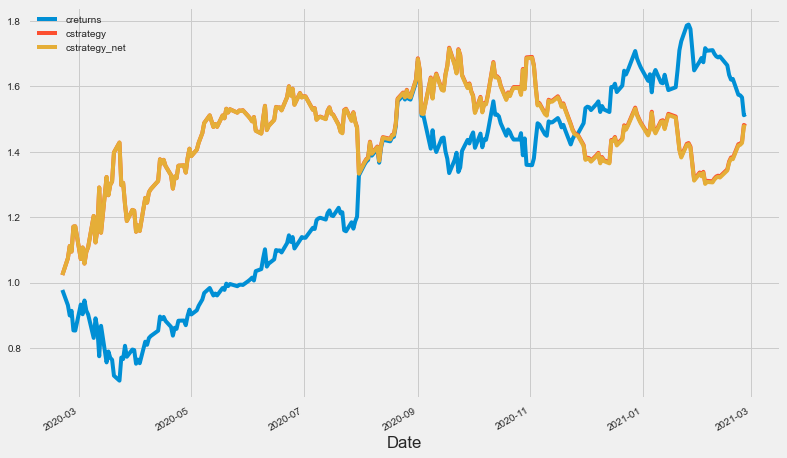

In [45]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

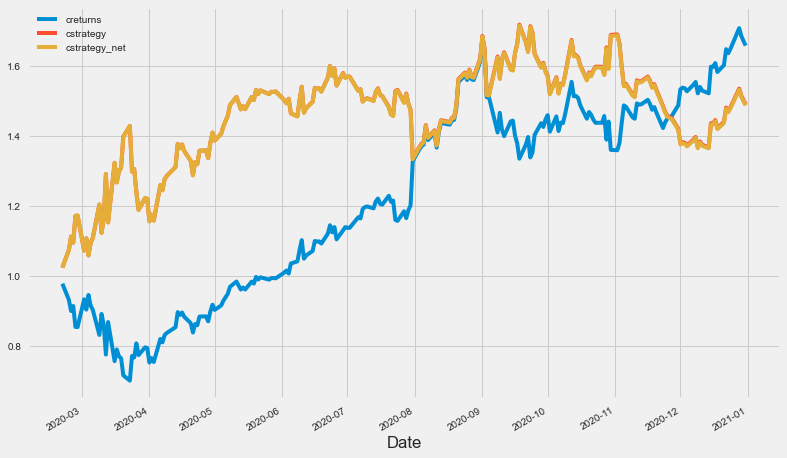

In [46]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

## Using the MACDBacktester Class

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")

In [49]:
pd.read_csv("forex_pairs.csv")

Date  AUDEUR=X  EURUSD=X  USDGBP=X
0     2004-01-01   0.59780  1.258194   0.56016
1     2004-01-02   0.60314  1.258194   0.55751
2     2004-01-05   0.60467  1.268698   0.55334
3     2004-01-06   0.60350  1.272103   0.54906
4     2004-01-07   0.60728  1.264095   0.55012
...          ...       ...       ...       ...
4290  2020-06-24   0.61349  1.131235   0.79841
4291  2020-06-25   0.60938  1.125087   0.80561
4292  2020-06-26   0.61373  1.122208   0.80480
4293  2020-06-29   0.61128  1.122586   0.81023
4294  2020-06-30   0.61097  1.124720   0.81231

[4295 rows x 4 columns]

In [ ]:
from MACDBacktester import MACDBacktester as MACD

In [ ]:
ptc = 0.00007

In [ ]:
tester = MACD("EURUSD=X", EMA_S = 12, EMA_L = 26, signal_mw = 9,
              start = "2004-01-01", end = "2020-06-30", tc = ptc)

In [ ]:
tester

In [ ]:
tester.data

In [ ]:
tester.test_strategy()

In [ ]:
tester.plot_results()

In [ ]:
tester.results

In [ ]:
tester.optimize_parameters((5, 20, 1), (21, 50, 1), (5, 20, 1))

In [ ]:
tester.plot_results()

__AUD / EUR__

In [ ]:
tester = MACD("AUDEUR=X", EMA_S = 12, EMA_L = 26, signal_mw = 9, 
              start = "2004-01-01", end = "2020-06-30", tc = 0)

In [ ]:
tester.test_strategy()

In [ ]:
tester.plot_results()

In [ ]:
tester.optimize_parameters((5, 20, 1), (21, 50, 1), (5, 20, 1))

In [ ]:
tester.plot_results()

__Optimization and Backtesting (2004-2014)__ ("In-Sample")

In [ ]:
tester = MACD("AUDEUR=X", EMA_S = 12, EMA_L = 26, signal_mw = 9,
              start = "2004-01-01", end = "2014-12-31", tc = 0)

In [ ]:
tester.optimize_parameters((5, 20, 1), (21, 50, 1), (5, 20, 1))

In [ ]:
tester.plot_results()

__Forward Testing (2015-2020)__ ("Out-Sample")

In [ ]:
forwardtester = MACD("AUDEUR=X", EMA_S = 6, EMA_L = 24, signal_mw = 7,
                     start = "2015-01-01", end = "2020-06-30", tc = 0)

In [ ]:
forwardtester.test_strategy()

In [ ]:
forwardtester.plot_results()

## Alternative Strategies and Interpretations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn")
from MACDBacktester import MACDBacktester as MACD

In [ ]:
tester = MACD("EURUSD=X", EMA_S = 12, EMA_L = 26, signal_mw = 9,
              start = "2004-01-01", end = "2020-06-30", tc = 0)

In [ ]:
alt = tester.data.dropna()
alt

__Main Strategy: MACD Signal Line Crossover__

In [ ]:
alt.loc["2016", ["MACD", "MACD_Signal"]].plot(figsize = (12, 8))
#plt.hlines(y = 0, xmin = alt.index[0], xmax = alt.index[-1], color = "r", label = "Zero")
plt.title("Signal Line Crossover", fontsize = 15)
plt.legend()
plt.show()

__Alternative 1: Zero Crossover__

In [ ]:
alt.loc["2016", "MACD"].plot(figsize = (12, 8))
plt.hlines(y = 0, xmin = alt.index[0], xmax = alt.index[-1], color = "r", label = "Zero")
plt.title("Zero Crossover", fontsize = 15)
plt.legend()
plt.show()

__Alternative 2: Divergence__

Convergence: 
- if __Price__ reaches __higher highs__ -> __MACD__ reaches __higher highs__ (confirmation)
- if __Price__ reaches __lower lows__ -> __MACD__ reaches __lower lows__ (confirmation) 

In [ ]:
alt.loc["03-2013":"06-2013", ["price", "MACD"]].plot(figsize = (12, 8), secondary_y = "MACD")
plt.show()

Divergence: 
- if __Price__ reaches __higher highs__ -> __MACD fails__ to reach higher highs (__Bearish Divergence__)
- if __Price__ reaches __lower lows__ -> __MACD fails__ to reach lower lows (__Bullish Divergence__)

In [ ]:
alt.loc["03-2016":"06-2016", ["price", "MACD"]].plot(figsize = (12, 8), secondary_y = "MACD")
plt.title("Bearish Divergence", fontsize = 15)
plt.show()

In [ ]:
alt.loc["05-2012":"11-2012", ["price", "MACD"]].plot(figsize = (12, 8), secondary_y = "MACD")
plt.title("Bullish Divergence", fontsize = 15)
plt.show()